In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
life_expectancy_clean = "resources/life_expectancy_clean.csv"

life_expectancy = pd.read_csv(life_expectancy_clean)

In [3]:
life_expectancy.head(16)

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,27.9,7.4,0.01,79.68,66.0,198.9,...,66.0,9.20,66.0,0.01,553.33,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,28.1,7.7,0.01,56.76,63.0,286.1,...,63.0,9.42,63.0,0.01,445.89,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,28.7,8.0,0.03,25.87,64.0,159.9,...,64.0,8.33,64.0,0.01,373.36,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,29.5,8.2,0.02,10.91,63.0,114.1,...,63.0,6.73,63.0,0.01,369.84,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,29.5,8.4,0.03,17.17,64.0,199.0,...,58.0,7.43,58.0,0.01,272.56,2589345.0,19.2,19.3,0.405,8.1


In [4]:
#Gather averages over the years for life expectancy, hep b, polio, and diptheria  
mean_lifeexp = life_expectancy.groupby('Country')["Life Expectancy"].mean()
mean_hep = life_expectancy.groupby('Country')["Hepatitis B Vaccines (%)"].mean()
mean_polio = life_expectancy.groupby('Country')["Polio Vaccines (%)"].mean()
mean_dipth = life_expectancy.groupby('Country')["Diphtheria Vaccines (%)"].mean()

#create data frame for all avereages (per country over the years)
avgs_percountry = pd.DataFrame({"Avg Life Expectancy (2000-2015)": mean_lifeexp,
                              "Avg Hep B Vac Coverage (2000-2015)": mean_hep,
                              "Avg Polio Vac Coverage (2000-2015)": mean_polio,
                              "Avg Dipth Vac Coverage (2000-2015)": mean_dipth})

avgs_percountry.head()

,Avg Life Expectancy (2000-2015),Avg Hep B Vac Coverage (2000-2015),Avg Polio Vac Coverage (2000-2015),Avg Dipth Vac Coverage (2000-2015)
Country,,,,
Afghanistan,58.193750,64.562500,48.375000,52.312500
Albania,75.156250,98.000000,98.125000,98.062500
Algeria,73.486667,76.454545,91.533333,91.666667
Angola,48.793333,71.000000,48.733333,46.600000
Antigua and Barbuda,74.966667,98.214286,97.666667,98.266667


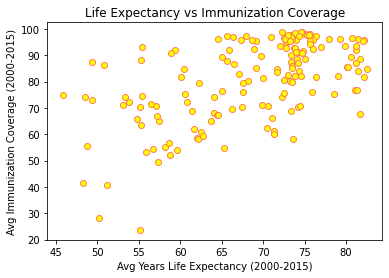

In [17]:
#Combine hep b, polio, and diptheria averages into one representational average for immunization coverage
sum_immu_avgs = avgs_percountry["Avg Hep B Vac Coverage (2000-2015)"] + avgs_percountry["Avg Polio Vac Coverage (2000-2015)"] + avgs_percountry["Avg Dipth Vac Coverage (2000-2015)"] 

#use this for testing immunization coverage variable  
immu_cov = sum_immu_avgs/3 

#creating data frame for immunization coverage and life expectancy 
comb_avg_immucov = pd.DataFrame({"Avg Life Expectancy (2000-2015)": mean_lifeexp,
                                 "Combined Avg Hepatitus, Polio, and Diptheria Immunization Coverage": immu_cov})

#QUESTION
#----------------------------------------------------
#Does increased immunization coverage positevely correlate with increased life expectancy? 
x_axis = comb_avg_immucov["Avg Life Expectancy (2000-2015)"]
y_axis = comb_avg_immucov["Combined Avg Hepatitus, Polio, and Diptheria Immunization Coverage"]
plt.scatter(x_axis, y_axis, marker = "o", edgecolors = "coral", facecolors="yellow")
plt.title("Life Expectancy vs Immunization Coverage")
plt.xlabel("Avg Years Life Expectancy (2000-2015)")
plt.ylabel("Avg Immunization Coverage (2000-2015)")
plt.show()
#Change x and y ticks for better visualization

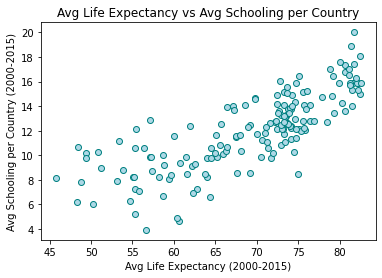

In [23]:
#use this for testing schooling variable
mean_school = life_expectancy.groupby('Country')["Schooling"].mean()

#Data frame for schooling and life expectancy 
schooling_avgs = pd.DataFrame({"Avg Life Expectancy (2000-2015)": mean_lifeexp,
                               "Avg Schooling per Country (2000-2015)": mean_school})

#QUESTION 
#Is increased schooling positively correlated with increased life expectancy?
x_axis = schooling_avgs["Avg Life Expectancy (2000-2015)"]
y_axis = schooling_avgs["Avg Schooling per Country (2000-2015)"]
plt.scatter(x_axis, y_axis, marker = "o", edgecolors = "teal", facecolors="lightblue")
plt.title("Avg Life Expectancy vs Avg Schooling per Country")
plt.xlabel("Avg Life Expectancy (2000-2015)")
plt.ylabel("Avg Schooling per Country (2000-2015)")
plt.show()

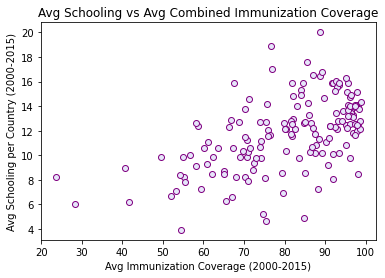

In [25]:
#Is increased schooling positively correlated with increased immunization coverage?

#data frame for schooling and combined immunization coverage
school_immu = pd.DataFrame({"Combined Avg Hepatitus, Polio, and Diptheria Immunization Coverage": immu_cov,
                               "Avg Schooling per Country (2000-2015)": mean_school})
#QUESTION
#---------------------------------------------------------------------------------
#Is increased schooling positively correlated with increased immunization coverage?
x_axis = school_immu["Combined Avg Hepatitus, Polio, and Diptheria Immunization Coverage"]
y_axis = school_immu["Avg Schooling per Country (2000-2015)"]
plt.scatter(x_axis, y_axis, marker = "o", edgecolors = "purple", facecolors="lavender")
plt.title("Avg Schooling vs Avg Combined Immunization Coverage per Country")
plt.xlabel("Avg Immunization Coverage (2000-2015)")
plt.ylabel("Avg Schooling per Country (2000-2015)")
plt.show()

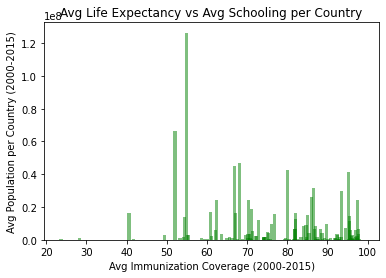

In [39]:
#gather the avg population from 2000-2015 per country and create new data frame
mean_population = life_expectancy.groupby('Country')["Population"].median()

#Data frame for popuation and avg schooling 
pop_immu = pd.DataFrame({"Avg Population per Country (2000-2015)": mean_population,
                         "Combined Avg Hepatitus, Polio, and Diptheria Immunization Coverage": immu_cov})

#Do countries with smaller populations have lower immunization coverage?
x_axis = pop_immu["Combined Avg Hepatitus, Polio, and Diptheria Immunization Coverage"]
y_axis = pop_immu["Avg Population per Country (2000-2015)"]
plt.bar(x_axis, y_axis, color="green", alpha = 0.5)
plt.title("Avg Life Expectancy vs Avg Schooling per Country")
plt.xlabel("Avg Immunization Coverage (2000-2015)")
plt.ylabel("Avg Population per Country (2000-2015)")
plt.show()
#adjust y ticks for better visualization 

In [10]:
# Do countries with lower populations have higher infant death rates?